First of all download the chicago crime dataset from kaggle 

In [1]:
# https://www.kaggle.com/datasets/usmanlovescode/city-of-chicago-crimes-2001-to-present-dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('crime.csv')

C:\Users\itxkakar\AppData\Local\Temp\ipykernel_8776\1143136787.py:1: DtypeWarning: Columns (0,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('crime.csv')


In [4]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11449702,JB373031,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,5.0,41.0,18,NaN,NaN,2018.0,04/09/2019 04:24:58 PM,NaN,NaN,NaN
3,11643334,JC209972,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,31.0,19.0,14,NaN,NaN,2018.0,04/04/2019 04:16:11 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687044 entries, 0 to 687043
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    687044 non-null  object 
 1   Case Number           687040 non-null  object 
 2   Date                  687040 non-null  object 
 3   Block                 687040 non-null  object 
 4   IUCR                  687040 non-null  object 
 5   Primary Type          687040 non-null  object 
 6   Description           687040 non-null  object 
 7   Location Description  681487 non-null  object 
 8   Arrest                687039 non-null  object 
 9   Domestic              687039 non-null  object 
 10  Beat                  687039 non-null  float64
 11  District              687039 non-null  float64
 12  Ward                  671780 non-null  float64
 13  Community Area        671865 non-null  float64
 14  FBI Code              687039 non-null  object 
 15  

In [6]:
df.dropna(inplace=True)

In [7]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [8]:
df['Primary Type'].value_counts()

Primary Type
BATTERY                              126548
THEFT                                121718
CRIMINAL DAMAGE                       67656
ASSAULT                               52222
DECEPTIVE PRACTICE                    40631
OTHER OFFENSE                         40451
NARCOTICS                             26793
MOTOR VEHICLE THEFT                   25439
BURGLARY                              22899
ROBBERY                               21147
WEAPONS VIOLATION                     19329
CRIMINAL TRESPASS                     12474
OFFENSE INVOLVING CHILDREN             7644
PUBLIC PEACE VIOLATION                 3146
CRIMINAL SEXUAL ASSAULT                3105
SEX OFFENSE                            3076
INTERFERENCE WITH PUBLIC OFFICER       2111
PROSTITUTION                           1482
ARSON                                  1331
CRIM SEXUAL ASSAULT                    1318
STALKING                                684
LIQUOR LAW VIOLATION                    529
CONCEALED CARRY LIC

### Crimes Places in chicago

In [9]:
df = df[df['Latitude'] != df['Latitude'].min()]

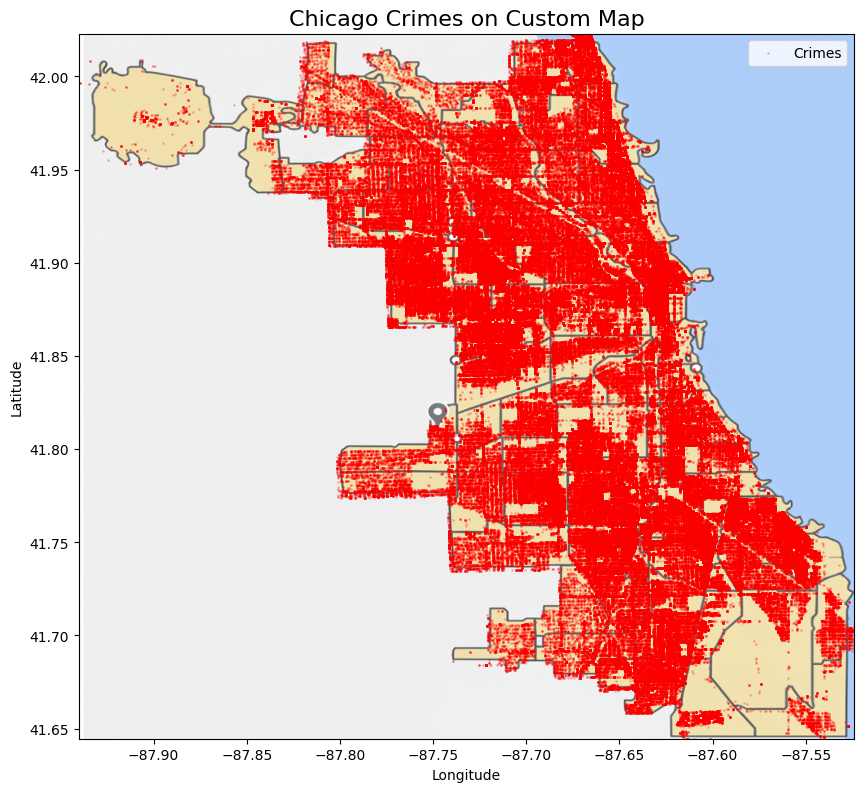

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load crime data

# Load background map image
img = mpimg.imread("map.png")

# Define Chicago bounding box (adjust if your map image is cropped differently)
min_lon, max_lon = -87.94011, -87.52414
min_lat, max_lat = 41.64454, 42.02304

# Plot
fig, ax = plt.subplots(figsize=(10, 10))

# Show background image
ax.imshow(img, extent=[min_lon, max_lon, min_lat, max_lat])

# Overlay crime locations (sample to avoid clutter)
ax.scatter(
    df["Longitude"],
    df["Latitude"],
    c="red", s=1, alpha=0.2, label="Crimes"
)

ax.set_title("Chicago Crimes on Custom Map", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.show()


In [11]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', infer_datetime_format=True)

C:\Users\itxkakar\AppData\Local\Temp\ipykernel_8776\1280980949.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce', infer_datetime_format=True)
C:\Users\itxkakar\AppData\Local\Temp\ipykernel_8776\1280980949.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce', infer_datetime_format=True)


In [12]:
df['month'] = df['Date'].dt.month_name()
df['day_of_week'] = df['Date'].dt.day_name()
df['hour'] = df['Date'].dt.hour

In [13]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,month,day_of_week,hour
6,10224881,HY411873,2015-09-03 18:00:00,044XX S UNIVERSITY AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,1184667.0,1875669.0,2015.0,02/10/2018 03:50:01 PM,41.813999,-87.598138,"(41.81399924, -87.598137918)",September,Thursday,18
11,10225155,HY412177,2015-09-05 22:42:00,007XX W IRVING PARK RD,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,True,False,...,1170563.0,1926785.0,2015.0,02/10/2018 03:50:01 PM,41.954584,-87.648376,"(41.954584472, -87.648375776)",September,Saturday,22
15,10225206,HY412253,2015-09-06 01:10:00,047XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,VACANT LOT/LAND,False,False,...,1177070.0,1873609.0,2015.0,02/10/2018 03:50:01 PM,41.808521,-87.626066,"(41.80852139, -87.62606631)",September,Sunday,1
17,10225234,HY412306,2015-09-06 02:00:00,002XX N ST LOUIS AVE,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,...,1153006.0,1901570.0,2015.0,02/10/2018 03:50:01 PM,41.885759,-87.713588,"(41.885759278, -87.713588042)",September,Sunday,2
23,10225308,HY412341,2015-09-06 02:35:00,013XX W ADDISON ST,2230,LIQUOR LAW VIOLATION,ILLEGAL CONSUMPTION BY MINOR,SIDEWALK,True,False,...,1166847.0,1924028.0,2015.0,09/17/2015 11:37:18 AM,41.947100,-87.662116,"(41.947099832, -87.662115668)",September,Sunday,2


In [14]:
def get_day_night(hour):
    if (hour >= 20) or (hour < 6):
        return "Night"
    else:
        return "Day"
    
df['is_night'] = df['hour'].apply(get_day_night)

Top crimes

C:\Users\itxkakar\AppData\Local\Temp\ipykernel_8776\656084343.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Primary Type', data= df, order= df['Primary Type'].value_counts().head(20).index, palette='mako')


<Axes: xlabel='count', ylabel='Primary Type'>

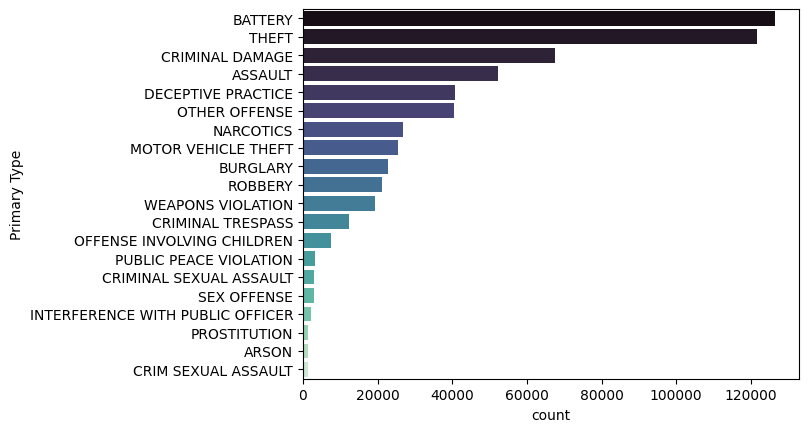

In [16]:
sns.countplot(y='Primary Type', data= df, order= df['Primary Type'].value_counts().head(20).index, palette='mako')

Arrest rate overall

In [19]:
df['Arrest']=df['Arrest'].map({True:1, False:0})

In [20]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,month,day_of_week,hour,is_night
6,10224881,HY411873,2015-09-03 18:00:00,044XX S UNIVERSITY AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,0,False,...,1875669.0,2015.0,02/10/2018 03:50:01 PM,41.813999,-87.598138,"(41.81399924, -87.598137918)",September,Thursday,18,Day
11,10225155,HY412177,2015-09-05 22:42:00,007XX W IRVING PARK RD,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,1,False,...,1926785.0,2015.0,02/10/2018 03:50:01 PM,41.954584,-87.648376,"(41.954584472, -87.648375776)",September,Saturday,22,Night
15,10225206,HY412253,2015-09-06 01:10:00,047XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,VACANT LOT/LAND,0,False,...,1873609.0,2015.0,02/10/2018 03:50:01 PM,41.808521,-87.626066,"(41.80852139, -87.62606631)",September,Sunday,1,Night
17,10225234,HY412306,2015-09-06 02:00:00,002XX N ST LOUIS AVE,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,0,False,...,1901570.0,2015.0,02/10/2018 03:50:01 PM,41.885759,-87.713588,"(41.885759278, -87.713588042)",September,Sunday,2,Night
23,10225308,HY412341,2015-09-06 02:35:00,013XX W ADDISON ST,2230,LIQUOR LAW VIOLATION,ILLEGAL CONSUMPTION BY MINOR,SIDEWALK,1,False,...,1924028.0,2015.0,09/17/2015 11:37:18 AM,41.947100,-87.662116,"(41.947099832, -87.662115668)",September,Sunday,2,Night


C:\Users\itxkakar\AppData\Local\Temp\ipykernel_8776\4236031849.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Arrest', data= df,  palette='mako')


<Axes: title={'center': 'Arrested'}, xlabel='count', ylabel='Arrest'>

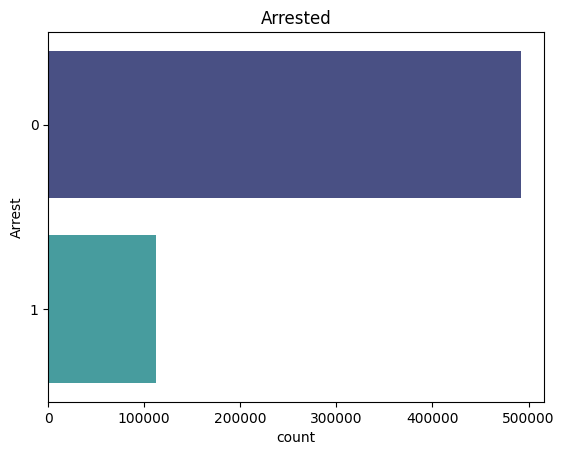

In [22]:
plt.title('Arrested')
sns.countplot(y='Arrest', data= df,  palette='mako')

In [27]:
type_crime_arrest = df.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False)

C:\Users\itxkakar\AppData\Local\Temp\ipykernel_8776\2508195891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=type_crime_arrest.index, x=type_crime_arrest.values, palette='mako' )


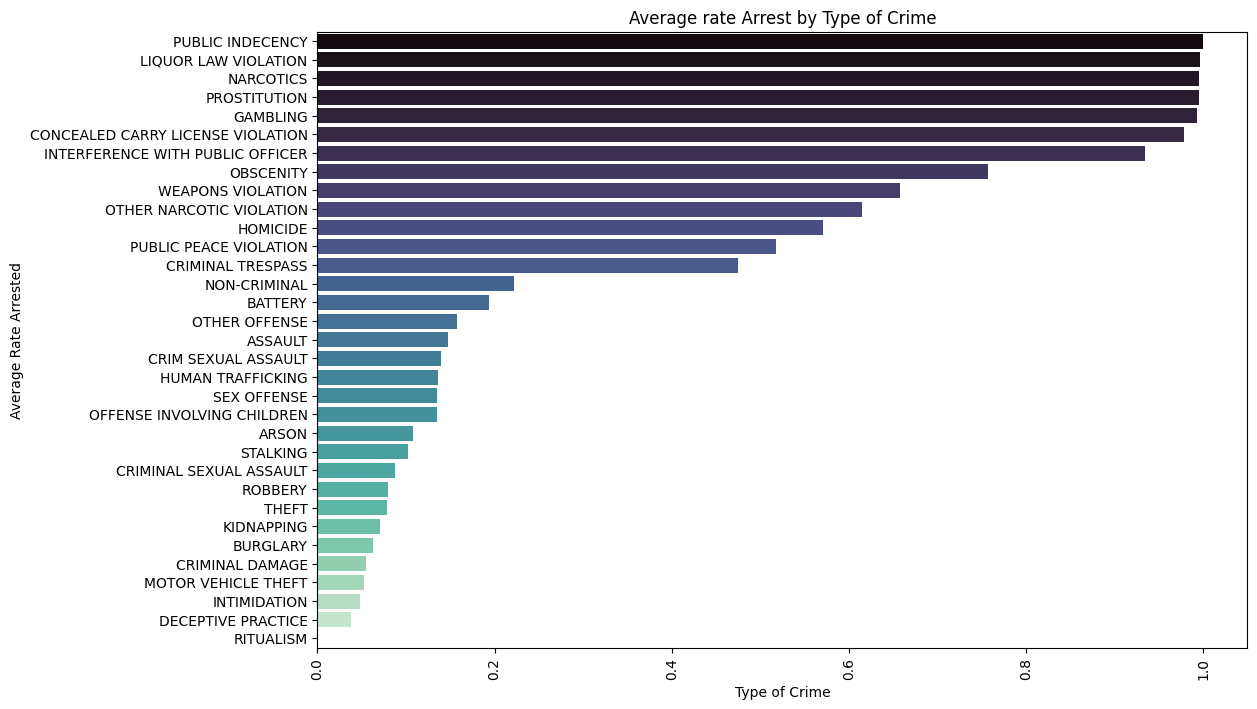

In [33]:
plt.figure(figsize=(12,8))
sns.barplot(y=type_crime_arrest.index, x=type_crime_arrest.values, palette='mako' )
plt.title('Average rate Arrest by Type of Crime')
plt.xlabel('Type of Crime')
plt.ylabel('Average Rate Arrested')
plt.xticks(rotation=90)
plt.show()

In [34]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,month,day_of_week,hour,is_night
6,10224881,HY411873,2015-09-03 18:00:00,044XX S UNIVERSITY AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,0,False,...,1875669.0,2015.0,02/10/2018 03:50:01 PM,41.813999,-87.598138,"(41.81399924, -87.598137918)",September,Thursday,18,Day
11,10225155,HY412177,2015-09-05 22:42:00,007XX W IRVING PARK RD,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,1,False,...,1926785.0,2015.0,02/10/2018 03:50:01 PM,41.954584,-87.648376,"(41.954584472, -87.648375776)",September,Saturday,22,Night
15,10225206,HY412253,2015-09-06 01:10:00,047XX S STATE ST,041A,BATTERY,AGGRAVATED: HANDGUN,VACANT LOT/LAND,0,False,...,1873609.0,2015.0,02/10/2018 03:50:01 PM,41.808521,-87.626066,"(41.80852139, -87.62606631)",September,Sunday,1,Night
17,10225234,HY412306,2015-09-06 02:00:00,002XX N ST LOUIS AVE,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,0,False,...,1901570.0,2015.0,02/10/2018 03:50:01 PM,41.885759,-87.713588,"(41.885759278, -87.713588042)",September,Sunday,2,Night
23,10225308,HY412341,2015-09-06 02:35:00,013XX W ADDISON ST,2230,LIQUOR LAW VIOLATION,ILLEGAL CONSUMPTION BY MINOR,SIDEWALK,1,False,...,1924028.0,2015.0,09/17/2015 11:37:18 AM,41.947100,-87.662116,"(41.947099832, -87.662115668)",September,Sunday,2,Night


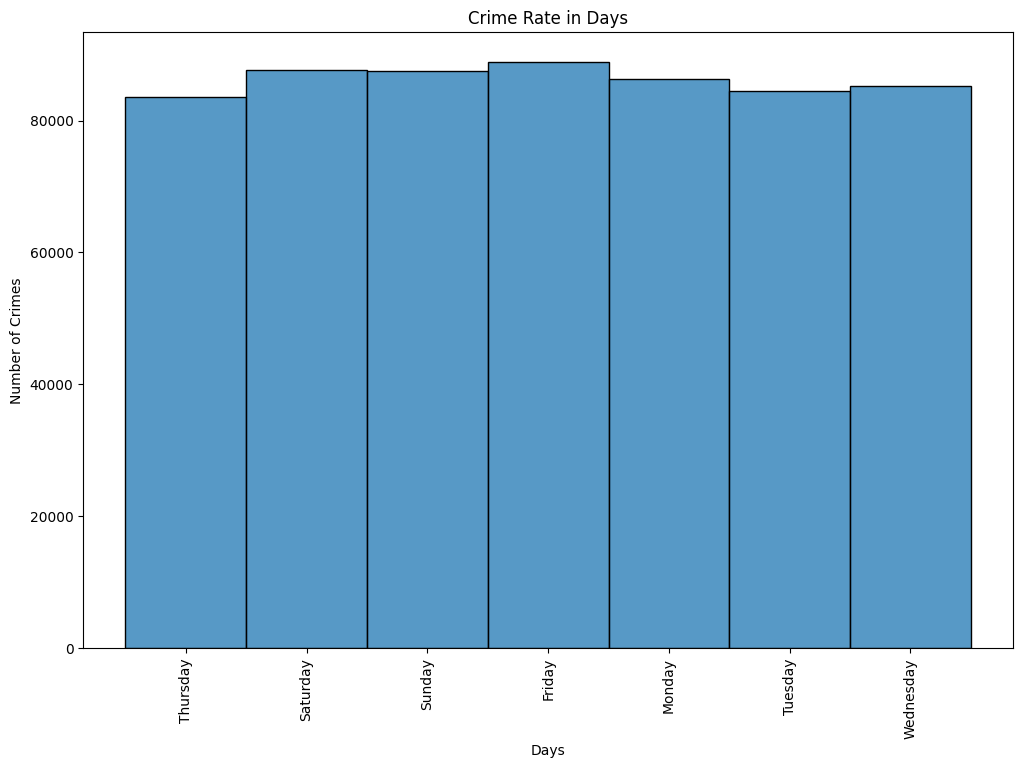

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df['day_of_week'] )
plt.title('Crime Rate in Days')
plt.xlabel('Days')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()

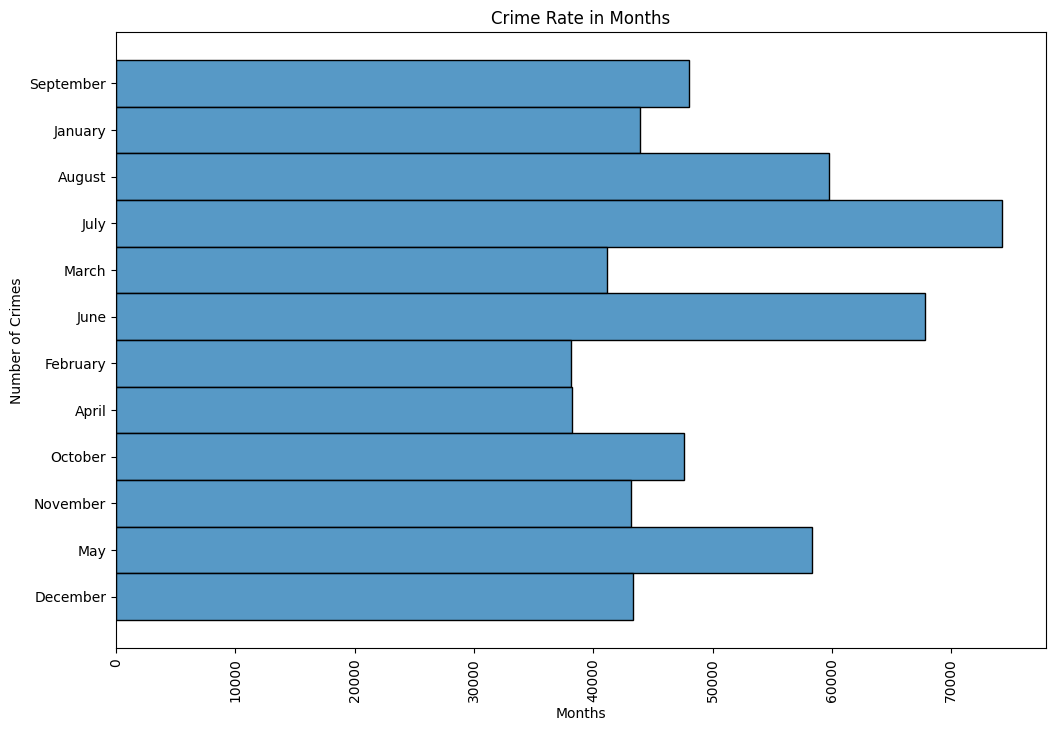

In [50]:
plt.figure(figsize=(12,8))
sns.histplot(y=df['month'] )
plt.title('Crime Rate in Months')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Date'>

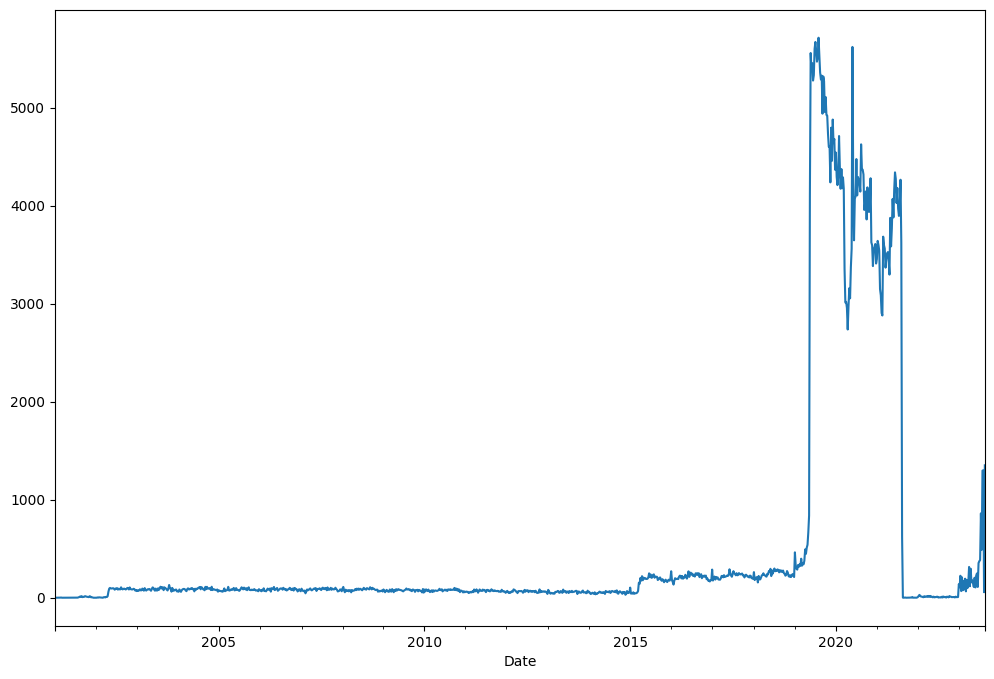

In [52]:
plt.figure(figsize=(12,8))
ts = df.set_index('Date').resample('W').size()
ts.plot()
